# C02 Emission: impact of different uage of fuels for energe throughout the time era.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.power import TTestIndPower
import seaborn as sns
%matplotlib inline


In [14]:
path = 'emission.csv'
df = pd.read_csv(path,on_bad_lines='skip')
df.head()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552,0,0,0,0,0.0,0
1,1752,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
2,1753,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
3,1754,UNITED KINGDOM,2554,2554,0,0,0,0,0.0,0
4,1755,UNITED KINGDOM,2555,2555,0,0,0,0,0.0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17232 entries, 0 to 17231
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         17232 non-null  int64  
 1   Country                      17232 non-null  object 
 2   Total                        17232 non-null  int64  
 3   Solid Fuel                   17232 non-null  int64  
 4   Liquid Fuel                  17232 non-null  int64  
 5   Gas Fuel                     17232 non-null  int64  
 6   Cement                       17232 non-null  int64  
 7   Gas Flaring                  17232 non-null  int64  
 8   Per Capita                   17232 non-null  float64
 9   Bunker fuels (Not in Total)  17232 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 1.3+ MB


In [16]:
df.describe()

,Year,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
count,17232.000000,1.723200e+04,1.723200e+04,17232.000000,17232.000000,17232.000000,17232.000000,17232.000000,17232.000000
mean,1961.579561,2.268712e+04,1.107010e+04,7589.085829,3189.767700,638.453865,199.718489,0.907776,560.330606
std,44.251691,1.132419e+05,6.206518e+04,39057.928585,20714.456024,6631.010202,1087.880733,2.194268,2414.320487
min,1751.000000,-1.473000e+03,-1.030000e+02,-4663.000000,-40.000000,0.000000,0.000000,-0.680000,0.000000
25%,1944.000000,1.170000e+02,0.000000e+00,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1972.000000,9.645000e+02,5.400000e+01,263.000000,0.000000,7.000000,0.000000,0.130000,4.000000
75%,1995.000000,8.059250e+03,2.002500e+03,2165.750000,71.000000,162.000000,0.000000,1.010000,133.000000
max,2014.000000,2.806634e+06,2.045156e+06,680284.000000,390719.000000,338912.000000,20520.000000,45.960000,45630.000000


In [23]:
df.isnull().sum()

Year                           0
Country                        0
Total                          0
Solid Fuel                     0
Liquid Fuel                    0
Gas Fuel                       0
Cement                         0
Gas Flaring                    0
Per Capita                     0
Bunker fuels (Not in Total)    0
dtype: int64

In [17]:
df['Per Capita'].describe()

count    17232.000000
mean         0.907776
std          2.194268
min         -0.680000
25%          0.000000
50%          0.130000
75%          1.010000
max         45.960000
Name: Per Capita, dtype: float64

In [25]:
#Statistc review for country data
df.groupby('Country').describe().head()

Year                                                            \
             count         mean        std     min      25%     50%      75%   
Country                                                                        
AFGHANISTAN   66.0  1981.500000  19.196354  1949.0  1965.25  1981.5  1997.75   
ALBANIA       82.0  1973.500000  23.815261  1933.0  1953.25  1973.5  1993.75   
ALGERIA      105.0  1961.428571  31.465139  1900.0  1936.00  1962.0  1988.00   
ANDORRA       25.0  2002.000000   7.359801  1990.0  1996.00  2002.0  2008.00   
ANGOLA        65.0  1982.000000  18.907670  1950.0  1966.00  1982.0  1998.00   

                     Total               ... Per Capita        \
                max  count         mean  ...        75%   max   
Country                                  ...                    
AFGHANISTAN  2014.0   66.0   592.924242  ...      0.040  0.12   
ALBANIA      2014.0   82.0   860.975610  ...      0.495  0.79   
ALGERIA      2014.0  105.0  9552.447619  ...      0.820  1.02   
ANDORRA      2014.0   25.0   133.280000  ...      2.030  2.22   
ANGOLA       2014.0   65.0  2187.507692  ...      0.210  0.40   

            Bunker fuels (Not in Total)                                      \
                                  count        mean         std  min    25%   
Country                                                                       
AFGHANISTAN                        66.0    4.303030    3.854946  0.0    0.0   
ALBANIA                            82.0    4.951220   11.972089  0.0    0.0   
ALGERIA                           105.0  270.295238  248.684266  0.0    0.0   
ANDORRA                            25.0    0.000000    0.000000  0.0    0.0   
ANGOLA                             65.0  260.200000  194.384461  0.0  128.0   

                                  
               50%    75%    max  
Country                           
AFGHANISTAN    4.0    7.0   13.0  
ALBANIA        0.0    0.0   49.0  
ALGERIA      274.0  506.0  687.0  
ANDORRA        0.0    0.0    0.0  
ANGOLA       245.0  357.0  718.0  

[5 rows x 72 columns]

In [33]:
#compare two time frame era
#sorted(df['Country'].unique())
#df['Country'].unique()
df_us = df.query('Country in["UNITED STATES OF AMERICA"]')
df_us.head(2)
#df_us.groupby('Per Capita').describe()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
76,1800,UNITED STATES OF AMERICA,69,69,0,0,0,0,0.0,0
81,1801,UNITED STATES OF AMERICA,73,73,0,0,0,0,0.0,0


In [39]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 76 to 17222
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         215 non-null    int64  
 1   Country                      215 non-null    object 
 2   Total                        215 non-null    int64  
 3   Solid Fuel                   215 non-null    int64  
 4   Liquid Fuel                  215 non-null    int64  
 5   Gas Fuel                     215 non-null    int64  
 6   Cement                       215 non-null    int64  
 7   Gas Flaring                  215 non-null    int64  
 8   Per Capita                   215 non-null    float64
 9   Bunker fuels (Not in Total)  215 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 18.5+ KB


In [40]:
df_us['Per Capita'].describe()

count    215.000000
mean       1.498093
std        2.298521
min        0.000000
25%        0.000000
50%        0.000000
75%        4.315000
max        5.960000
Name: Per Capita, dtype: float64

In [41]:
# Split data EPA before 1990 and after 1990 data
us_90 = df_us[df_us.Year < 1990]
us_90.info()

us_20 = df_us[df_us.Year >= 1990]
us_20.info()

display(us_90.head(2))
display(us_20.head(2))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 76 to 11871
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         190 non-null    int64  
 1   Country                      190 non-null    object 
 2   Total                        190 non-null    int64  
 3   Solid Fuel                   190 non-null    int64  
 4   Liquid Fuel                  190 non-null    int64  
 5   Gas Fuel                     190 non-null    int64  
 6   Cement                       190 non-null    int64  
 7   Gas Flaring                  190 non-null    int64  
 8   Per Capita                   190 non-null    float64
 9   Bunker fuels (Not in Total)  190 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 16.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 12064 to 17222
Data columns (total 10 columns):
 #   Column            

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
76,1800,UNITED STATES OF AMERICA,69,69,0,0,0,0,0.0,0
81,1801,UNITED STATES OF AMERICA,73,73,0,0,0,0,0.0,0


,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
12064,1990,UNITED STATES OF AMERICA,1315354,485909,543736,273788,9710,2211,5.12,35600
12256,1991,UNITED STATES OF AMERICA,1314657,481567,534850,286432,9311,2498,5.06,37321


In [43]:
df_us["Per Capita"].value_counts().sum()

215

In [44]:
# measure skewness and kurtosis
print(stats.describe(us_90["Per Capita"]))
print(stats.describe(us_20["Per Capita"]))

DescribeResult(nobs=190, minmax=(0.0, 5.96), mean=1.0327894736842105, variance=4.09711545808967, skewness=1.4880043126577798, kurtosis=0.3217747634890791)
DescribeResult(nobs=25, minmax=(4.38, 5.42), mean=5.034400000000001, variance=0.10320900000000001, skewness=-1.059710095030525, kurtosis=-0.3631446842061581)


In [47]:
#plot each emission of US
df_usa = df_us.groupby(['Year']).sum()
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1800 to 2014
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total                        215 non-null    int64  
 1   Solid Fuel                   215 non-null    int64  
 2   Liquid Fuel                  215 non-null    int64  
 3   Gas Fuel                     215 non-null    int64  
 4   Cement                       215 non-null    int64  
 5   Gas Flaring                  215 non-null    int64  
 6   Per Capita                   215 non-null    float64
 7   Bunker fuels (Not in Total)  215 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 15.1 KB


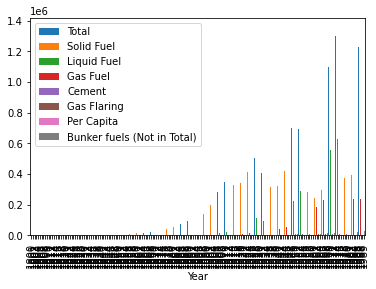

In [48]:
ax = us_90.plot(kind ='bar', x = 'Year')

In [ ]:
#The bar graph for Years are harder to read due to the dataset for USA is between 1750's to 1990's.

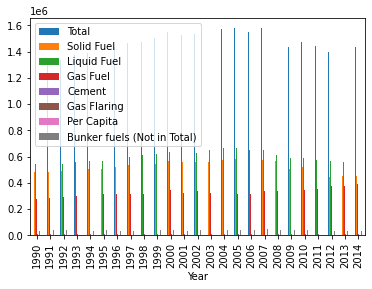

In [49]:
ax = us_20.plot(kind ='bar', x = 'Year')

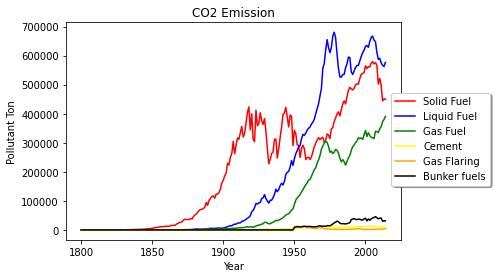

In [50]:
# for graph to better visual understanding
arg1 = df_usa["Solid Fuel"]
arg2 = df_usa["Liquid Fuel"]
arg3 = df_usa["Gas Fuel"]
arg4 = df_usa["Cement"]
arg5 = df_usa["Gas Flaring"]
arg6 = df_usa["Bunker fuels (Not in Total)"]
x = df_usa.index

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, arg1, label="Solid Fuel", color="red")
ax.plot(x, arg2, label="Liquid Fuel", color="blue")
ax.plot(x, arg3, label="Gas Fuel", color="green")
ax.plot(x, arg4, label="Cement", color="yellow")
ax.plot(x, arg5, label="Gas Flaring", color="orange")
ax.plot(x, arg6, label="Bunker fuels", color="black")

plt.xlabel("Year")
plt.ylabel("Pollutant Ton")
plt.title("CO2 Emission")
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width * 1, chartBox.height])
ax.legend(loc="upper center", bbox_to_anchor=(1.12, 0.7), shadow=True, ncol=1)
plt.show()

In [51]:
#per capita
df_usa = df_us.groupby(['Year']).sum()
df_usa

,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
Year,,,,,,,,
1800,69,69,0,0,0,0,0.00,0
1801,73,73,0,0,0,0,0.00,0
1802,79,79,0,0,0,0,0.00,0
1803,81,81,0,0,0,0,0.00,0
1804,91,91,0,0,0,0,0.00,0
...,...,...,...,...,...,...,...,...
2010,1471375,521330,590751,347716,9139,2439,4.69,40388
2011,1442509,498720,575746,355630,9335,3079,4.56,40600
2012,1396083,443904,566582,372277,10191,3129,4.38,29859


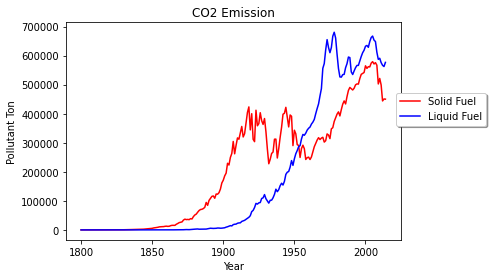

In [52]:
# for graph to better visual understanding
arg1 = df_usa["Solid Fuel"]
arg2 = df_usa["Liquid Fuel"]

x = df_usa.index

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, arg1, label="Solid Fuel", color="red")
ax.plot(x, arg2, label="Liquid Fuel", color="blue")


plt.xlabel("Year")
plt.ylabel("Pollutant Ton")
plt.title("CO2 Emission")
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width * 1, chartBox.height])
ax.legend(loc="upper center", bbox_to_anchor=(1.12, 0.7), shadow=True, ncol=1)
plt.show()

In [53]:
#Analysis:This data suggested the largest emission in early times were solid fuel which has grown rapidly fast befor 1900 and the lowest Emission is Gas Flaring that appears to be flat over the years. Note this data is only related to the US.

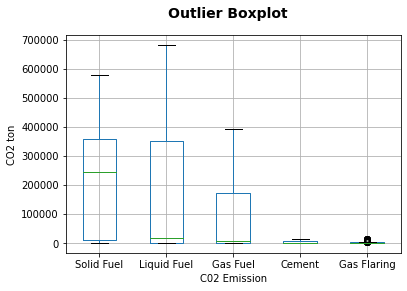

In [54]:
#boxplot
fig = plt.figure()
fig.suptitle('Outlier Boxplot', fontsize = 14, fontweight = 'bold')
ax = fig.add_subplot(111)

df_usa.boxplot(column = ['Solid Fuel', 'Liquid Fuel', 'Gas Fuel', 'Cement','Gas Flaring']);
ax.set_xlabel('C02 Emission')
ax.set_ylabel('CO2 ton')
plt.show() 

In [55]:
#Correlation
#Correlation
cor = df_usa.drop(['Per Capita'], axis =1).corr()
cor

,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Bunker fuels (Not in Total)
Total,1.000000,0.908975,0.979133,0.961104,0.962995,0.490194,0.905702
Solid Fuel,0.908975,1.000000,0.809205,0.769844,0.790683,0.356407,0.744614
Liquid Fuel,0.979133,0.809205,1.000000,0.982137,0.982943,0.516906,0.912249
Gas Fuel,0.961104,0.769844,0.982137,1.000000,0.972198,0.514763,0.940980
Cement,0.962995,0.790683,0.982943,0.972198,1.000000,0.579429,0.905360
Gas Flaring,0.490194,0.356407,0.516906,0.514763,0.579429,1.000000,0.408791
Bunker fuels (Not in Total),0.905702,0.744614,0.912249,0.940980,0.905360,0.408791,1.000000


In [ ]:
'''*Solids, Gases, Liquids, and Cement are all highly correlated with the Total C02 emission category. Flaring has low correlation, which means that Flaring C02 emissions are more independent.
*Correlation values range from 1 to 0. Values closer to 1 are highly correlated, values closer to 0 have high inverse correlation. Correlations show relationships over 0.9. This means those two variables are highly correlated. Which means that there is significance is high correlations behind the emission variable, but emission effect also need to look up population and economic growth. However correlation does not show the mean. This means need some extra research.'''

# perform T-Test and also do 95% confidence interval, tukey test

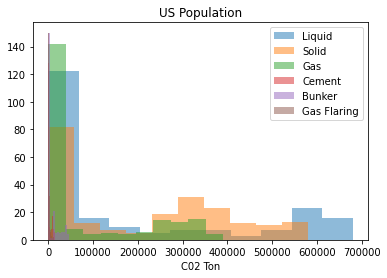

In [63]:
Liquid  = df_usa['Liquid Fuel']
Solid = df_usa['Solid Fuel']
Gas = df_usa['Gas Fuel']
Cement = df_usa['Cement']
Gas_Flaring = df_usa['Gas Flaring']
Bunker = df_usa['Bunker fuels (Not in Total)']
plt.hist(Liquid,  alpha = 0.5, label = 'Liquid')
plt.hist(Solid, alpha = 0.5, label = 'Solid')
plt.hist(Gas, alpha = 0.5, label = 'Gas')
plt.hist(Cement, alpha = 0.5, label = 'Cement')
plt.hist(Bunker, alpha = 0.5, label = 'Bunker')
plt.hist(Gas_Flaring, alpha = 0.5, label = 'Gas Flaring')
plt.legend(loc = 'upper right')

plt.xlabel('C02 Ton')
plt.title('US Population')
plt.show() 

# T-Test

HO: independent sample have identical value.
Signiiiificance for p-value : 0.05
ie. if v-palue >= 0.05 fail to reject HO else reject HO.

In [65]:
print(stats.ttest_ind(Liquid, Solid))

Ttest_indResult(statistic=-1.4976079173195929, pvalue=0.1349722558331552)


# Hypothesis P-value is greater then 0.05 therefore HO: fail to reject.

In [2]:
#Notes
#We know we can reject the null from either of these results:
#The test statistic is greater than 1.96. The p-value is less than < .05.
#Remember, the way to interpret this p-value is like this:
#There is a .001% chance of observing a difference as large as what is observed 
#even if the two population means are identical (the null hypothesis is true)."
#It is not: There is a 99.99% chance that the difference observed reflects a 
#real difference between populations and a .001% chance that the difference is due to chance.

In [68]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt(
        (sample_1_var / sample_1_n) + (sample_2_var / sample_2_n)
    )
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return "The difference in means at the 95% confidence interval (two-tail) is between {} and {}".format(
        ci_lower, ci_upper
    )


get_95_ci(us_90["Liquid Fuel"], us_20["Liquid Fuel"])

#We can interpret this result as saying that with 95% confidence between {} and {}.

'The difference in means at the 95% confidence interval (two-tail) is between 443317.94410099875 and 507506.8811621592'

In [69]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt(
        (sample_1_var / sample_1_n) + (sample_2_var / sample_2_n)
    )
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return "The difference in means at the 95% confidence interval (two-tail) is between {} and {}".format(
        ci_lower, ci_upper
    )

get_95_ci(us_90["Solid Fuel"], us_20["Solid Fuel"])

'The difference in means at the 95% confidence interval (two-tail) is between 326023.52551687317 and 382395.8976410216'

In [70]:
df_usa = df_us.groupby(['Per Capita']).sum()
df_usa

,Year,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Bunker fuels (Not in Total)
Per Capita,,,,,,,,
0.00,281175,24364307,18637451,4531480,1125857,69522,0,0
3.97,1954,677689,249303,290178,121179,6398,10631,10060
4.09,1958,748069,242452,332982,155759,7570,9306,11546
4.10,1961,785521,242206,354071,173694,7854,7696,11918
4.15,1959,770642,248629,343465,161902,8251,8394,11623
4.18,1960,788300,250536,349790,171950,7750,8274,11648
4.19,1962,814619,251315,364287,184598,8163,6256,11335
4.21,1952,694618,293170,273190,109931,5860,12468,10784
4.24,1953,711175,290927,286594,115541,6209,11905,10973


In [ ]:
g = sns.pointplot(data=[us_90["Liquid Fuel"], us_20["Liquid Fuel"]], join=False)

g.set(xticklabels=["us_90", "us_20"])

In [ ]:
g = sns.pointplot(data=[us_90["Solid Fuel"], us_20["Solid Fuel"]], join=False)

g.set(xticklabels=["us_90", "us_20"])

The sample between solid and liquid fuel are liner before 1990 and after 1990. For liquid fuel is increased while the solid fuel decrease over each year.

Conclusion

- Population growth have significant to C02 emission growth.
- The emission types are highly correlated except for flaring.
- Solids and flaring appear to get flat over the years, while liquids and gas emissions appear to be growing.